In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
import math

In [2]:
data = pd.read_csv("q2.csv", names=["e", "U", "I"])

In [3]:
sigma_e = 1
sigma_U = 0.02
sigma_I = 1
data["N"] = round(data["U"] * data["I"] / 1000, 4)
data["R"] = round((data["N"] * 1000000) / (data["I"]**2), 2)
sigma_N = data["N"].mean() * math.sqrt((sigma_I / data["I"].mean())**2 + (sigma_U / data["U"].mean())**2)
X = data["N"].values
sigma_X = sigma_N
data["T"] = round(data["e"] / 40.7, 3)
Y = data["T"].values
sigma_Y = sigma_e / 40.7

In [4]:
A = np.vstack([X, np.ones(len(X))]).T
k, b = np.linalg.lstsq(A, Y, rcond=None)[0]
sigma_k = math.sqrt((Y.std() - Y.mean()**2 ) / (X.std() - X.mean()**2 ) - b**2 ) / math.sqrt(len(X))
eps_k = sigma_k / k
#sigma_b = sigma_k * math.sqrt(X.std() / X.mean() - X.mean()**2 )

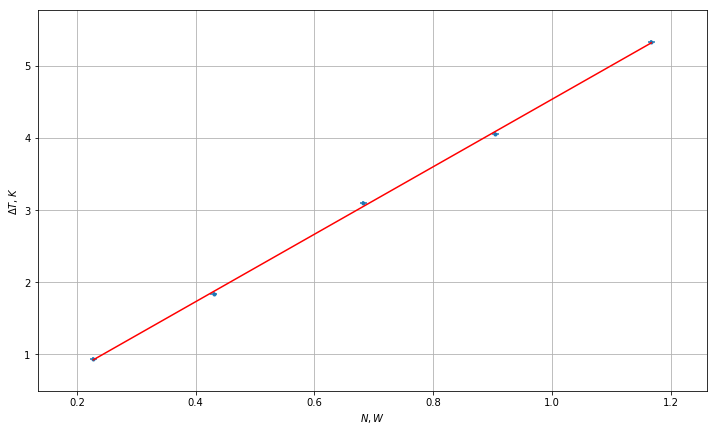

In [5]:
fig = plt.figure(figsize=(12, 7))
ax = fig.gca()
plt.scatter(X, Y, marker=".")
plt.errorbar(X, Y, xerr=sigma_X, yerr=sigma_Y, linestyle="None")
delta_x = (X.max() - X.min()) / len(X)
delta_y = (Y.max() - Y.min()) / len(Y)
ax.set_xlim(X.min() - delta_x/2, X.max() + delta_x/2)
ax.set_ylim((Y.min() - delta_y/2), Y.max() + delta_y/2)
plt.xlabel("$N, W$")
plt.ylabel("$\Delta T, K$")
plt.plot(X, (k*X + b), 'r', label='Fitted line')
plt.grid(True)
plt.savefig("q2.png")

In [6]:
eps_k

0.7309349785490631

In [7]:
b

-0.14110114772498708

In [9]:
data

,e,U,I,N,R,T
0,38,2.55,89.3,0.2277,28.55,0.934
1,75,3.50,122.9,0.4302,28.48,1.843
2,126,4.41,154.7,0.6822,28.51,3.096
3,165,5.08,178.1,0.9047,28.52,4.054
4,217,5.77,202.3,1.1673,28.52,5.332
